In [1]:
#importing necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

D:\Anaconda_Navigator\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
In D:\Anaconda_Navigator\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Anaconda_Navigator\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In D:\Anaconda_Navigator\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#loading the dataset
df_lc_loan=pd.read_csv('loan.csv')

df_lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Analysing Dataset loaded for data understanding

In [3]:
df_lc_loan.shape

(39717, 111)

In [4]:
df_lc_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df_lc_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
# Checking what percent of data is null in each column.
(df_lc_loan.isna().sum()/df_lc_loan.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
df_data_dict=pd.read_excel('Data_Dictionary.xlsx')

In [8]:
df_data_dict[:-2]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [9]:
df_data_dict.dtypes

LoanStatNew    object
Description    object
dtype: object

In [10]:
df_data_dict.rename(columns = {'verified_status_joint':'verification_status_joint'},inplace = True)

In [11]:
# Checking description of columns having null values lesser than 40%
for col in df_lc_loan.columns:
    if df_lc_loan[col].isna().sum()/df_lc_loan.shape[0] <0.40:
        print('Name : ',col)
        print('Description : ',df_data_dict[df_data_dict.LoanStatNew==col].iloc[0,1])
        print('*************************************')

Name :  id
Description :  A unique LC assigned ID for the loan listing.
*************************************
Name :  member_id
Description :  A unique LC assigned Id for the borrower member.
*************************************
Name :  loan_amnt
Description :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
*************************************
Name :  funded_amnt
Description :  The total amount committed to that loan at that point in time.
*************************************
Name :  funded_amnt_inv
Description :  The total amount committed by investors for that loan at that point in time.
*************************************
Name :  term
Description :  The number of payments on the loan. Values are in months and can be either 36 or 60.
*************************************
Name :  int_rate
Description :  Interest Rate on the loan
***************************

# Data Cleaning

In [12]:
# Removing records where loan_status is Current,as these will not be of use in analysis
df_lc_loan=df_lc_loan[~(df_lc_loan['loan_status']=='Current')]

<b>Conveting issue_date column to proper date format

In [13]:
df_lc_loan.issue_d = pd.to_datetime(df_lc_loan.issue_d, format='%b-%y')
df_lc_loan['issue_month']=pd.DatetimeIndex(df_lc_loan.issue_d).month
df_lc_loan['issue_year']=pd.DatetimeIndex(df_lc_loan.issue_d).year

<B>Cleaning Emp_Length column for analysis

In [14]:
df_lc_loan.emp_length=df_lc_loan.emp_length.str.strip(' ')
df_lc_loan['emp_length']=df_lc_loan['emp_length'].str.strip('years')
df_lc_loan['emp_length']=df_lc_loan['emp_length'].str.strip('year')

df_lc_loan=df_lc_loan.replace({'emp_length':{'< 1 ': '0','10+ ':'10'}})

df_lc_loan.emp_length.unique()

array(['10', '0', '3 ', '8 ', '9 ', '4 ', '5 ', '1 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [15]:
# Cleaning Interest Rate for analysis
df_lc_loan['int_rate']=df_lc_loan['int_rate'].str.strip('%').astype('float')

### Aggregating and analysing Null columns

In [16]:
#There are some columns with 100% null values, writing a script to separate columns based on null value percentage.

cols={}  # Dictionary  to store columns having less than 40% data missing

cols_na={}  # Dictionary to store columns with more than 40% data missing

for i in df_lc_loan.columns:
    
    if df_lc_loan[i].isna().sum()/df_lc_loan.shape[0]<0.4:
        
        cols[i]=(df_lc_loan[i].isna().sum()/df_lc_loan.shape[0])*100     # storing column name and percent data missing as key-value pair
    
    else:
        
        cols_na[i]=(df_lc_loan[i].isna().sum()/df_lc_loan.shape[0])*100  # storing column name and percent data missing as key-value pair

        

#Converting dictionaries to dataframes for better visualisation and understanding

df_na_cols=pd.DataFrame(cols_na.items(),columns=['Column_Name','Percent_data_missing'])

df_cols=pd.DataFrame(cols.items(),columns=['Column_Name','Percent_data_missing'])

In [17]:
# Dataframe with columns having more than 40% data missing 
df_na_cols.head()

,Column_Name,Percent_data_missing
0,mths_since_last_delinq,64.559193
1,mths_since_last_record,92.897322
2,next_pymnt_d,100.000000
3,mths_since_last_major_derog,100.000000
4,annual_inc_joint,100.000000


In [18]:
# Dataframe with columns having less than 40% data missing 
df_cols.head()

,Column_Name,Percent_data_missing
0,id,0.0
1,member_id,0.0
2,loan_amnt,0.0
3,funded_amnt,0.0
4,funded_amnt_inv,0.0


In [19]:
# Dropping columns having 100% null data, since they can't be used for EDA

df_lc_loan.drop(df_na_cols[(df_na_cols['Percent_data_missing']==100)]['Column_Name'],axis=1,inplace=True)

In [20]:
df_lc_loan.shape

(38577, 58)

In [21]:
df_lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  object        
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  37544 non-null  object    

### Removing unique identifires, customer behaviour columns, columns with data not useful for analysis

In [22]:
# Dropping ID columns, as these unique identifiers don't provide any meaningful information for analysis
df_lc_loan.drop(['id','member_id','url','zip_code'],axis=1,inplace=True)

In [23]:
# Dropping customer behaviour variables, because these are not available at the time of loan application and therefore, they cannot be used in analysis.
df_lc_loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1,inplace=True)

In [24]:
df_lc_loan.shape

(38577, 33)

In [25]:
df_lc_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'addr_state',
       'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_month', 'issue_year'],
      dtype='object')

In [26]:
# dropping columns with only one value, customer behavious columns and text columns
df_lc_loan.drop(['policy_code','pymnt_plan','tax_liens','collections_12_mths_ex_med','acc_now_delinq','delinq_amnt','chargeoff_within_12_mths','desc','emp_title','title','initial_list_status','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

#### Encoding Categorical columns for analysis

In [27]:
#Encoding Columns
loan_status_order=['Fully Paid','Charged Off']
loan_status_type=pd.CategoricalDtype(categories=loan_status_order, ordered=True)
df_lc_loan['loan_status_enc']=df_lc_loan['loan_status'].astype(loan_status_type).cat.codes


home_order=['OWN','MORTGAGE','RENT','OTHER','NONE']
home_cat_type=pd.CategoricalDtype(categories=home_order, ordered=True)
df_lc_loan['home_ownership_enc']=df_lc_loan['home_ownership'].astype(home_cat_type).cat.codes

### Imputing missing values with median in emp_length
as it's a categorical column we can use Median to replace NA values

In [28]:
df_lc_loan['emp_length'].median()

4.0

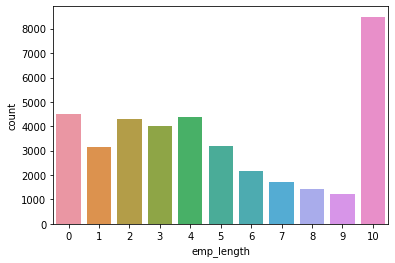

In [29]:
df_lc_loan['emp_length']=df_lc_loan['emp_length'].fillna(df_lc_loan['emp_length'].median())

df_lc_loan['emp_length']=df_lc_loan['emp_length'].astype(int)
sns.countplot(df_lc_loan.emp_length)
plt.show()

<B> Checking spread of Annual Income column

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


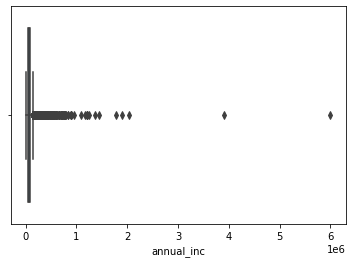

In [30]:
print(df_lc_loan['annual_inc'].describe())

sns.boxplot(df_lc_loan.annual_inc)
plt.show()

### Handling Outliers in Annual Income column
Using InterQuartile range to remove them:<br>
IQR=Q2-Q1<br>
low=Q1-1.5  * IQR<br>
high=Q2+1.5 * IQR

In [31]:
Q1=df_lc_loan.annual_inc.quantile(0.25)
Q2=df_lc_loan.annual_inc.quantile(0.75)
IQR=Q2-Q1
low=Q1-1.5*IQR
high=Q2+1.5*IQR
df_lc_loan['annual_inc']=df_lc_loan['annual_inc'][(df_lc_loan['annual_inc'] > (Q1-1.5*IQR)) & (df_lc_loan['annual_inc'] < (Q2+1.5*IQR))]

In [32]:
# Since subgrade column contains Grade also, so taking sub grade values only
df_lc_loan['sub_grade']=df_lc_loan['sub_grade'].apply(lambda x: x[-1] )
df_lc_loan['sub_grade']=df_lc_loan['sub_grade'].astype(int)

## Univariate Analysis on Continuous columns

13.37


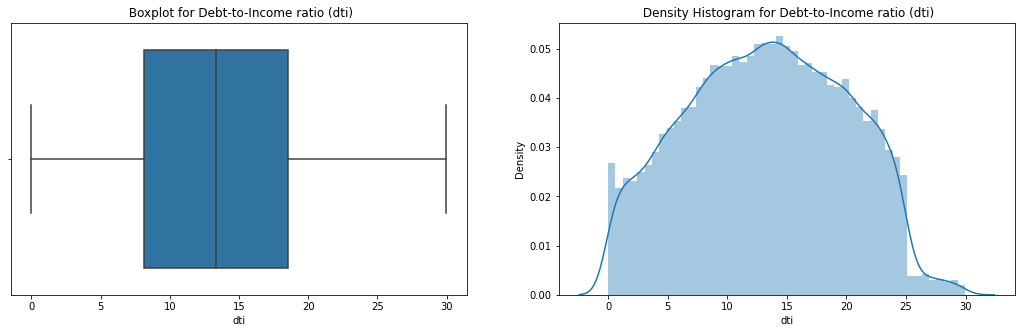

In [33]:
#Plotting box plot and density histogram for DTI 
print(df_lc_loan['dti'].median())
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
ax1.set_title(' Boxplot for Debt-to-Income ratio (dti)')
sns.boxplot(df_lc_loan['dti'],ax=ax1)
ax2.set_title(' Density Histogram for Debt-to-Income ratio (dti)')
sns.distplot(df_lc_loan.dti,ax=ax2)
plt.show()

### Observation 
Dti stands for Debt-to-income ratio, it tells us about the percentage of gross monthly income that is used to pay debt and determines borrowing risk.<br>
Median value is 13.37, 75 percentile is at 18 and 25 percentile at 8.<br>
From the density plot it can be infered that, dti has gradual increase,but sudden decrease after 25

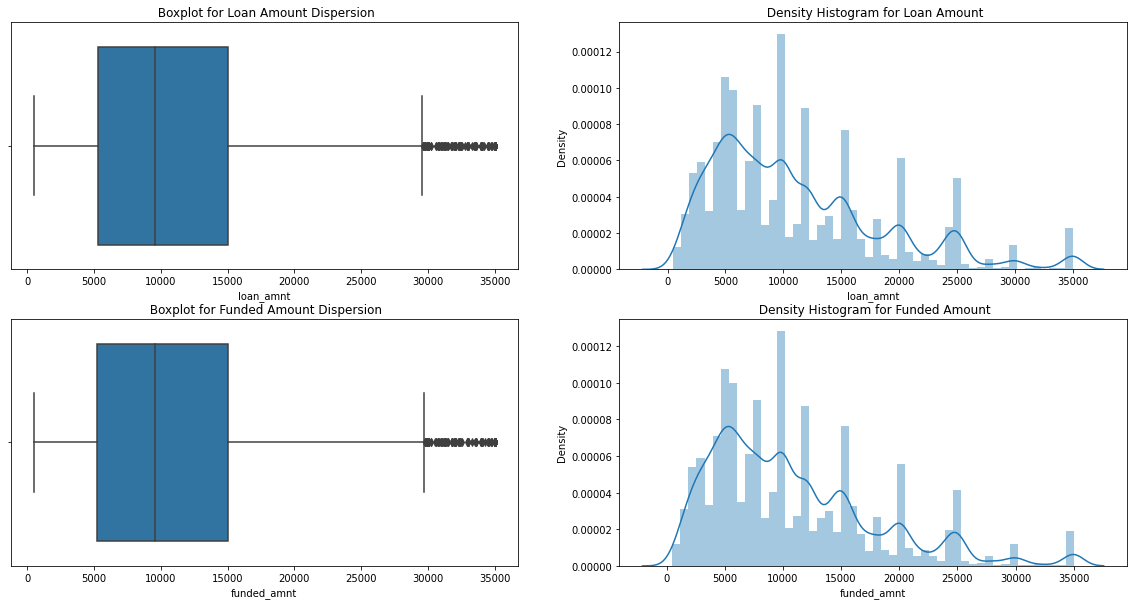

In [34]:
# Plotting box plot and density histogram for Loan Amouont and Funded Amount
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,10))
ax1.set_title(' Boxplot for Loan Amount Dispersion')
sns.boxplot(df_lc_loan['loan_amnt'],ax=ax1)
ax2.set_title(' Density Histogram for Loan Amount')
sns.distplot(df_lc_loan['loan_amnt'],ax=ax2)
ax3.set_title(' Boxplot for Funded Amount Dispersion')
sns.boxplot(df_lc_loan['funded_amnt'],ax=ax3)
ax4.set_title(' Density Histogram for Funded Amount')
sns.distplot(df_lc_loan['funded_amnt'],ax=ax4)
plt.show()

### Observation
    
Loan amount ranges from 0 to 35000, median value being at 10000, while the 25 and 75 percentile lie at 5000 and 15000 respectively.<br>
Density for loan amount spikes for 5000, followed by 10000 and then decresing gradually.

Funded amount also ranges from 0 to 35000, but the median value is slightly lesser than loan amount at..., 25 and 75 percentile for funded amount coincide with loan amount.
Density for funded amount also resembles the pattern of loan amount

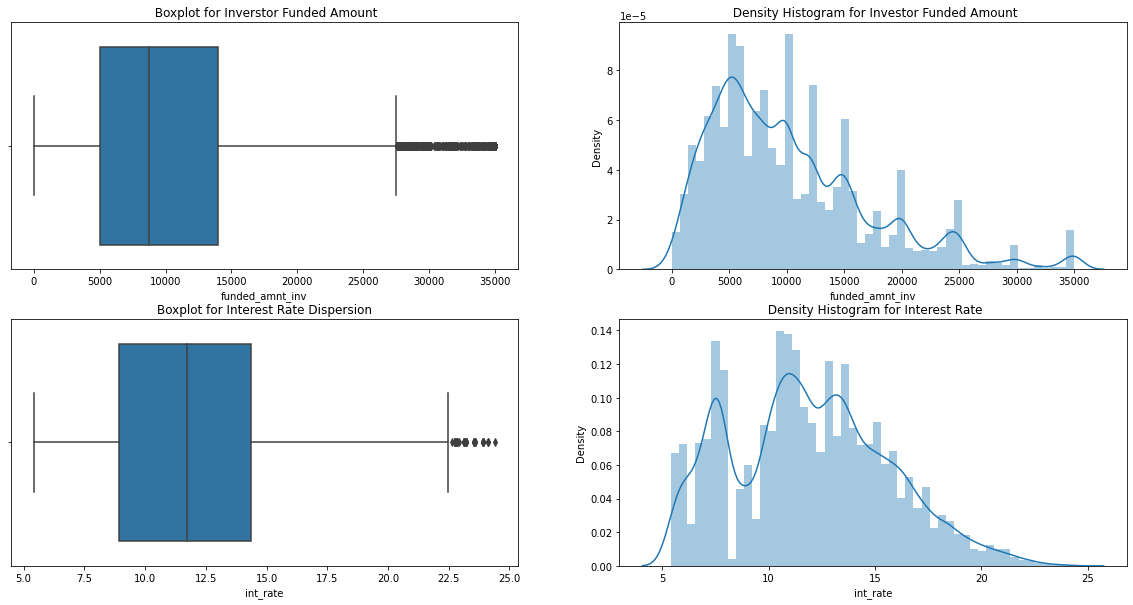

In [35]:
#Plotting box plot and density histogram for Funded Amount and Interest Rate
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,10))
ax1.set_title(' Boxplot for Inverstor Funded Amount')
sns.boxplot(df_lc_loan['funded_amnt_inv'],ax=ax1)
ax2.set_title(' Density Histogram for Investor Funded Amount')
sns.distplot(df_lc_loan['funded_amnt_inv'],ax=ax2)
ax3.set_title('Boxplot for Interest Rate Dispersion')
sns.boxplot(df_lc_loan['int_rate'],ax=ax3)
ax4.set_title(' Density Histogram for Interest Rate')
sns.distplot(df_lc_loan['int_rate'],ax=ax4)
plt.show()

### Observation
Funded amount by inverstors also appears in similar fashion as of loan amount and funded amount,

Interest rate lies varies from 5% to 25%, median value at 12% and 25 and 75 percentile at 8% and 14% resectively.
Density for interest rate is highest at around 12% indicating that majority of customer get loans at around 12%

 Loan amount median is around 10000, and 25% at 5000 75% at 15000 maximum and minimum values at 30000 and 0 respectively<br>
 Similar obeservations for funded amount and amount funded by investors. There are outliers in these fields, 
<br><br>For Interest Rate minimum rate is 5 ranging upto 25, median value at around 12

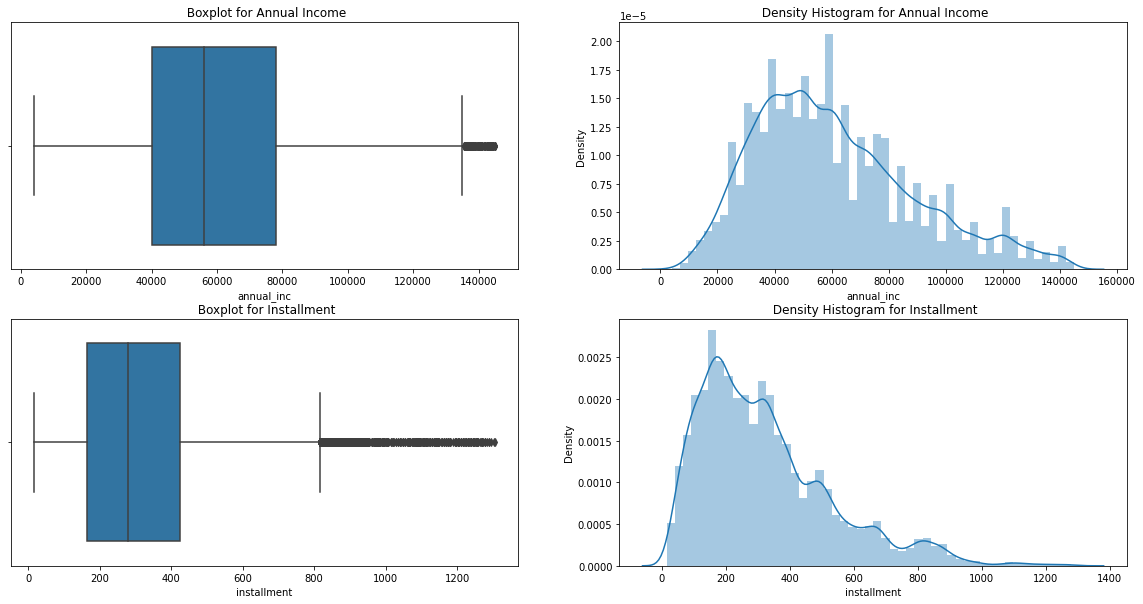

In [36]:
# Plotting box plot and density histogram for Annual Income and Installment amount
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,10))
ax1.set_title(' Boxplot for Annual Income')
sns.boxplot(df_lc_loan.annual_inc,ax=ax1)
ax2.set_title(' Density Histogram for Annual Income')
sns.distplot(df_lc_loan.annual_inc,ax=ax2)
ax3.set_title(' Boxplot for Installment')
sns.boxplot(df_lc_loan.installment,ax=ax3)
ax4.set_title(' Density Histogram for Installment')
sns.distplot(df_lc_loan.installment,ax=ax4)
plt.show()

### Observation
After removing the outliers in annual income, the median value lies at 55000,while the interquartile range is 40000 to 80000.

For installments the median value is at 300 and the IQR is between 175 to 410.

# Univariate Analysis for Categorical Variables

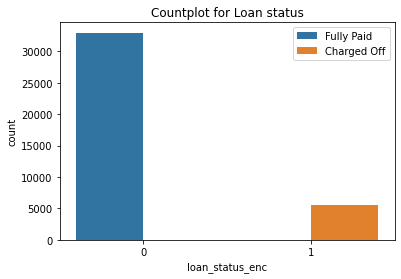

In [37]:
# Plotting Countplot and  for Loan Status
ax=sns.countplot(x=df_lc_loan['loan_status_enc'],hue=df_lc_loan['loan_status_enc'])
ax.set_title('Countplot for Loan status')
plt.legend(labels=['Fully Paid','Charged Off'])
plt.show()

### Observation 
Most lenders pay back the loan amount, but there's considerable amount of people committing frauds and causing business for Lending Club

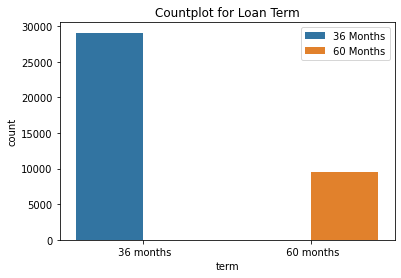

In [38]:
# Plotting countplot for Loan term
ax=sns.countplot(x=df_lc_loan['term'],hue=df_lc_loan['term'])
ax.set_title('Countplot for Loan Term')
plt.legend(labels=['36 Months','60 Months'])
plt.show()

### Observation
Majority of customers opt for 3 year loan period as compared to 5 year loan period

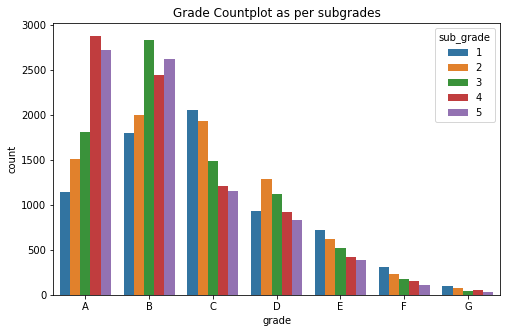

In [39]:
# Plotting Countplot separated by subgrades for Grades column
plt.figure(figsize=(8,5))
sns.countplot(x=df_lc_loan['grade'],order=['A','B','C','D','E','F','G'],hue=df_lc_loan['sub_grade'])
plt.title('Grade Countplot as per subgrades')
plt.show()

### Observation  
the percentage of your gross monthly income that is used to pay your monthly debt and determines your borrowing risk.

A1 being lowest risk and G5 being the highest risk. Based on above graph it can be said that with increase in grade the number of customers decreases

Mode value for home ownership:  RENT


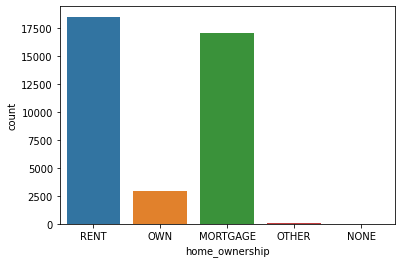

In [40]:
# Plotting Countplot for home Ownership
print('Mode value for home ownership: ',df_lc_loan.home_ownership.mode()[0])    
sns.countplot(x=df_lc_loan['home_ownership'])
plt.show()

### Observation
Most customers have rented houses,followed by having houses on mortgage and small portion of customers have their own house.

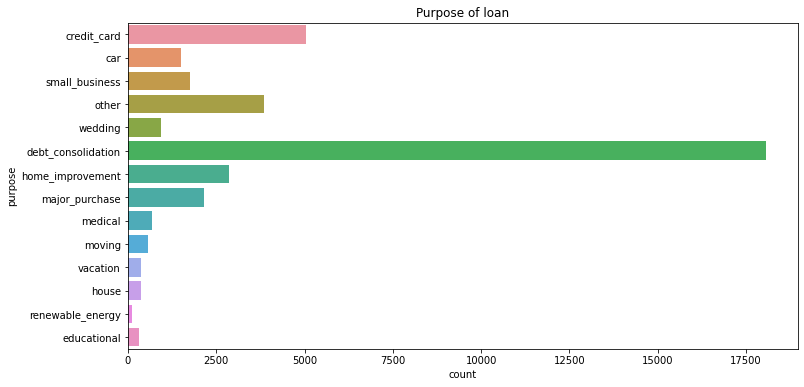

In [41]:
# Plotting Countplot for purpose of loan
plt.figure(figsize=(12,6))
sns.countplot(data=df_lc_loan,y=df_lc_loan.purpose)
plt.title('Purpose of loan')
plt.show()

<b> Observation </b>Most People apply for loan with purpose of debt consolidation

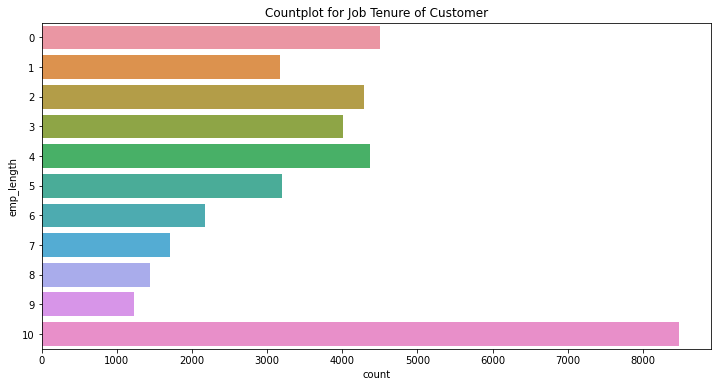

In [42]:
# Plotting countplot to analyse employee job tenure
plt.figure(figsize=(12,6))
sns.countplot(data=df_lc_loan,y=df_lc_loan.emp_length)
plt.title('Countplot for Job Tenure of Customer')
plt.show()

### Observation
Customers have good job experience, majority of cutomers have 10 years or more job experience

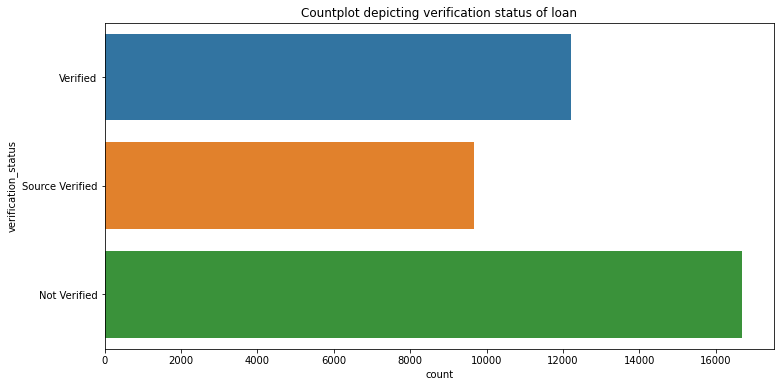

In [43]:
# Plotting Countplot for verification status
plt.figure(figsize=(12,6))
sns.countplot(data=df_lc_loan,y=df_lc_loan.verification_status)
plt.title('Countplot depicting verification status of loan')
plt.show()

# Bivariate Analysis

Bivariate Alalysis for Continuous Variables verses Loan Status

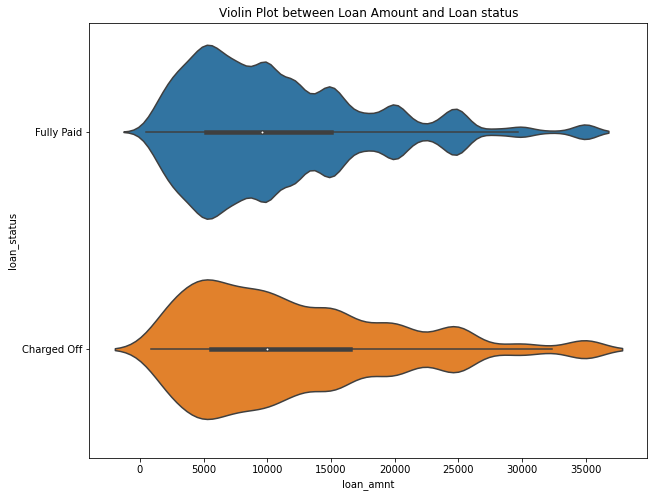

In [44]:
# Plotting violinplot to check relation between loan amount and loan status
plt.figure(figsize=(10,8))
plt.title('Violin Plot between Loan Amount and Loan status')
sns.violinplot(x=df_lc_loan.loan_amnt,y=df_lc_loan.loan_status)
plt.show()

### Observation

Most customers apply for small loan amounts, as we can see high density in both categories around 5000, but as the loan amount increases there's a gradual/subtle decrease in density for defaulter(Charged Off), similar pattern is not observed with fully paid customers(non-defaulters)

The dispersion of loan amount is higher for defaulter as the 75 percentile and maximum value of loan_amount is much ahead of the non-defaulters,This may imply that defaulters may face challenges in managing higher loan amounts, leading to committing fraud and causing loss of business to Lending Club.

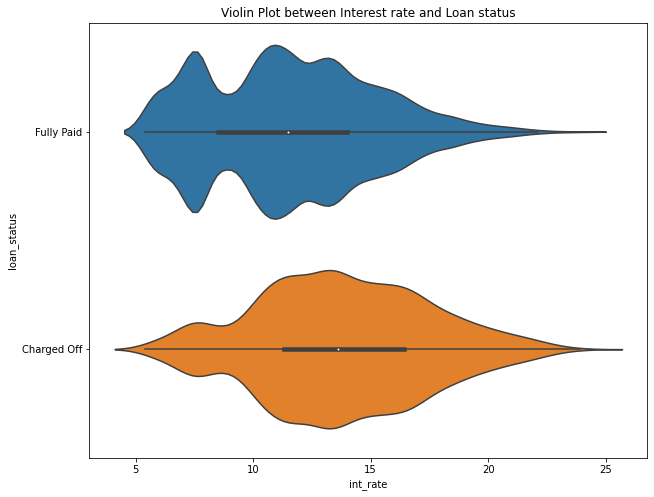

In [45]:
# Plotting violinplot to check relation between interest rate and loan status
plt.figure(figsize=(10,8))
plt.title('Violin Plot between Interest rate and Loan status')
sns.violinplot(x=df_lc_loan.int_rate,y=df_lc_loan.loan_status)
plt.show()

### Observation
Median value for fully paid is around 10%, and higher density between 5%-10% and between 10%-12%.  
On the other hand for charged off median value close to 15%.
Most Chargedoff customer got loan at interest rate of 10-15%, as the graph is dense in this area.
<br>Therefore,it can be infered that higher interest rate can cause more business loss

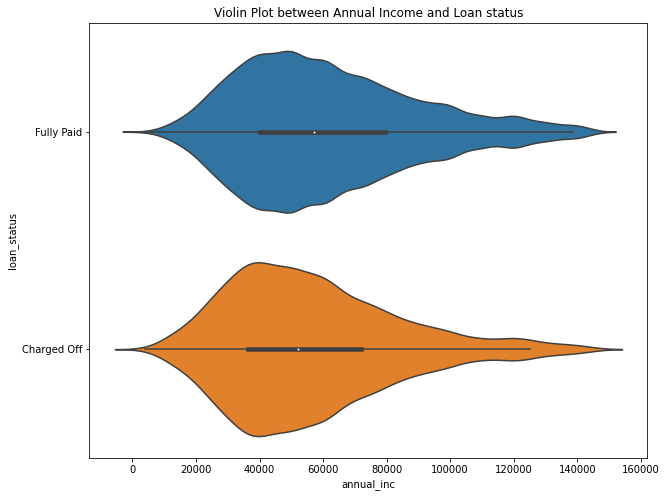

In [46]:
# Plotting violinplot to check relation between Annual income and loan status
plt.figure(figsize=(10,8))
plt.title('Violin Plot between Annual Income and Loan status')
sns.violinplot(x=df_lc_loan.annual_inc,y=df_lc_loan.loan_status)
plt.show()

 ### Observation 
In case of Fully Paid Customers, the density dispersion is more gradual with increase in annual income, whereas in case of Charged off(Defaulters) density drops steeply as the annual income increases.

Also, its evident that there's difference in 75% and median values in both cases, for Fully paid customers(Non-defaulters) the annual income median is higher than there counterpart(defaulters).

It can be said that customers with high annual income tend to default less.

### Bivariate Analysis of Continuous Variables using Binning against Loan Status

In [47]:
# Defining functions to calculate default percentage for binned continuous columns
def percent_defaulters(col1,col2):
    group=df_lc_loan.groupby(col1)
    filter_data=group.apply(lambda x:x[x['loan_status_enc']==1][col1].count())
    return pd.DataFrame((filter_data/group[col2].count())*100)
def bivar_analyse(col1):
    group=df_lc_loan.groupby(by=col1)
    filter_data=group.apply(lambda x:x[x['loan_status_enc']==1][col1].count())
    return pd.DataFrame((filter_data/group[col1].count())*100)

In [48]:
# Creating bins for loan amount, funded amount and funded amount by investors
loan_amnt_bins=['0-4000','4000-8000','8000-12000','12000-16000','16000-20000','20000-24000','24000-28000','28000-32000','32000-36000']
df_lc_loan['loan_amt_groups'] = pd.cut(df_lc_loan['loan_amnt'], bins=9,precision =0,labels=loan_amnt_bins)
funded_amnt_bins=['0-4000','4000-8000','8000-12000','12000-16000','16000-20000','20000-24000','24000-28000','28000-32000','32000-36000']
df_lc_loan['funded_amt_groups'] = pd.cut(df_lc_loan['funded_amnt'], bins=9,precision =0,labels=funded_amnt_bins)
funded_amnt_inv_bins=['0-4000','4000-8000','8000-12000','12000-16000','16000-20000','20000-24000','24000-28000','28000-32000','32000-36000']
df_lc_loan['funded_amt_inv_groups'] = pd.cut(df_lc_loan['funded_amnt_inv'], bins=9,precision =0,labels=loan_amnt_bins)

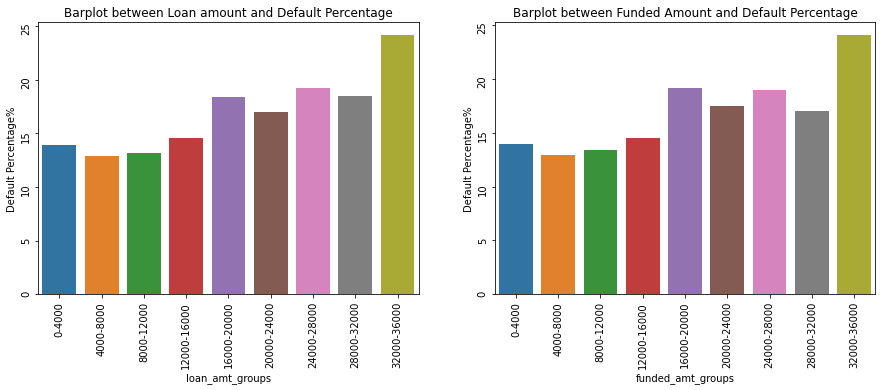

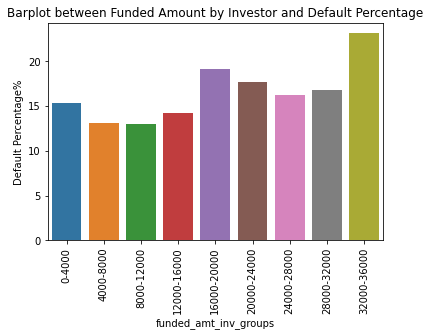

In [49]:
# Plotting barplots between loan amount and default percentage, funded amount and loan percentage and funded amount by investors and default percentage
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=percent_defaulters('loan_amt_groups','loan_amnt').index,y=percent_defaulters('loan_amt_groups','loan_amnt')[0],ax=ax1)
sns.barplot(x=percent_defaulters('funded_amt_groups','funded_amnt').index,y=percent_defaulters('funded_amt_groups','funded_amnt')[0],ax=ax2)
ax1.set_title('Barplot between Loan amount and Default Percentage')
ax1.set_ylabel('Default Percentage%')
ax1.tick_params(labelrotation=90)
ax2.set_title('Barplot between Funded Amount and Default Percentage')
ax2.set_ylabel('Default Percentage%')
ax2.tick_params(labelrotation=90)
plt.show()

sns.barplot(x=percent_defaulters('funded_amt_inv_groups','funded_amnt_inv').index,y=percent_defaulters('funded_amt_inv_groups','funded_amnt_inv')[0])
plt.title('Barplot between Funded Amount by Investor and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=90)
plt.show()

### Observation

It can be infered from above bar plots that loan amount, funded amount and inverstor funded are correlated.

Also, with increase in loan amount, percentage of defaulters is also increasing, it can be said that customers take large sum of money as loan but later it becomes difficut for them to return money back.

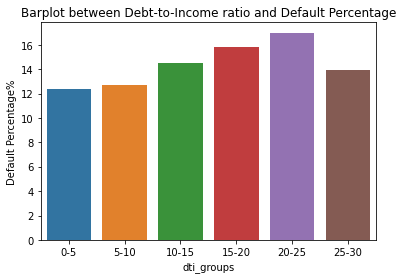

In [50]:
# Creating bins for DTI

df_lc_loan['dti_groups'] = pd.cut(df_lc_loan['dti'], bins=6,precision =0,labels =['0-5','5-10','10-15','15-20','20-25','25-30'])

# Plotting bar plot to analyse between dti and loan default percentage
sns.barplot(x=percent_defaulters('dti_groups','dti').index,y=percent_defaulters('dti_groups','dti')[0])
plt.title('Barplot between Debt-to-Income ratio and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=0)
plt.show()

<b> Observation </b> As per analysis of above plot, customers with high debt-to-income ratio will tend to commit fraud, as they already have high debt and they are spending money in other loans as well so there's a high probability of fraud.

Although, there's a suuden drop in defaulter's percentage for dti 25-30, but it's still a potential risk to provide loan to customers with higher dti.

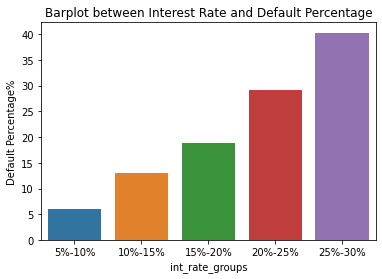

In [51]:
# Creating bins for Interest rate
df_lc_loan['int_rate_groups'] = pd.cut(df_lc_loan['int_rate'], bins=5,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])

# Plotting bar plot to analyse between interest rate  and loan default percentage
sns.barplot(x=percent_defaulters('int_rate_groups','int_rate').index,y=percent_defaulters('int_rate_groups','int_rate')[0])
plt.title('Barplot between Interest Rate and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=0)
plt.show()

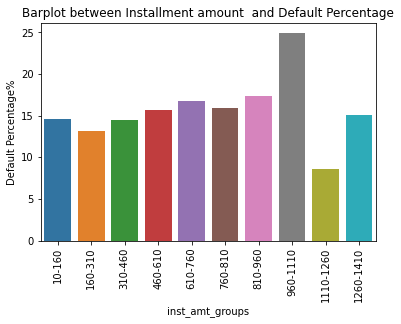

In [52]:
# Creating bins for installments
install_bin=['10-160','160-310','310-460','460-610','610-760','760-810','810-960','960-1110','1110-1260','1260-1410']
df_lc_loan['inst_amt_groups'] = pd.cut(df_lc_loan['installment'], bins=10,precision =0,labels=install_bin)

# Plotting bar plot to analyse between installment  and loan default percentage
sns.barplot(x=percent_defaulters('inst_amt_groups','installment').index,y=percent_defaulters('inst_amt_groups','installment')[0])
plt.title('Barplot between Installment amount  and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=90)
plt.show()

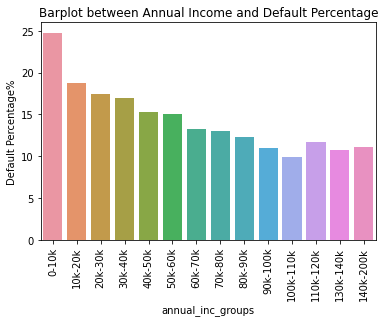

In [53]:
# Creating bins for annual income
df_lc_loan['annual_inc_groups'] = pd.cut(df_lc_loan['annual_inc'], bins=14,precision =0,labels =['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100k-110k','110k-120k','130k-140k','140k-200k'])

# Plotting bar plot to analyse between annual income and loan default percentage
sns.barplot(x=percent_defaulters('annual_inc_groups','annual_inc').index,y=percent_defaulters('annual_inc_groups','annual_inc')[0])
plt.title('Barplot between Annual Income and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=90)
plt.show()

### Observation
1) It can be easily infered that with increase in interest rates and dti, lower incomes and high installment amounts customers will tend more towards committing frauds.

2) Higher interest rate leads to higher default percentage.

3) Lower income groups tend to commit fraud more than higher income groups.

4) Higher installments for loaned amount also leads to increase in default loan percentage.

# Bivariate Categorical

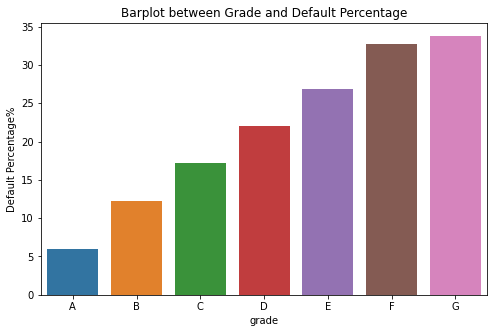

In [54]:
# Plotting bar plot to analyse between Grades and loan default percentage
fig,ax1=plt.subplots(1,1,figsize=(8,5))
ax2.set_title('Countplot of Grade and subgrade for Charged_Off customer')
ax1.set_title('Fully Paid')
sns.barplot(x=percent_defaulters('grade','grade').index,y=percent_defaulters('grade','grade')[0],ax=ax1)
plt.title('Barplot between Grade and Default Percentage')
plt.ylabel('Default Percentage%')
plt.show()

### Observation
Customers with higher risk grades (eg., D,E,F,G) commit more frauds, as compared to lower risk grade customers

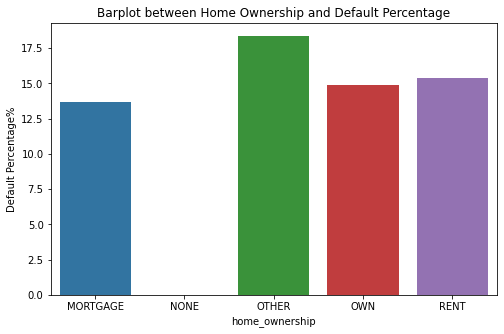

In [55]:
# Plotting bar plot to analyse between home ownership and loan default percentage
plt.figure(figsize=(8,5))
sns.barplot(x=percent_defaulters('home_ownership','home_ownership').index,y=percent_defaulters('home_ownership','home_ownership')[0])
plt.title('Barplot between Home Ownership and Default Percentage')
plt.ylabel('Default Percentage%')
plt.show()

### Observation
Cutomers with home ownership as Other commit maximum frauds, followed by rent and own

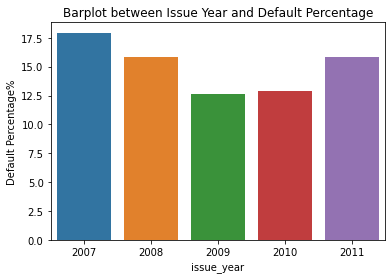

In [56]:
# Plotting bar plot to analyse between issue year and loan default percentage
sns.barplot(x=bivar_analyse('issue_year').index,y=bivar_analyse('issue_year')[0])
plt.title('Barplot between Issue Year and Default Percentage')
plt.ylabel('Default Percentage%')
plt.show()

### Observation
In 2007 there was an economic crisis in USA and in 2011, so the business loss for Lending Club is higher in these years, effects of crisis in 07 were observed till 08, causing more frauds in 2007-2008 period

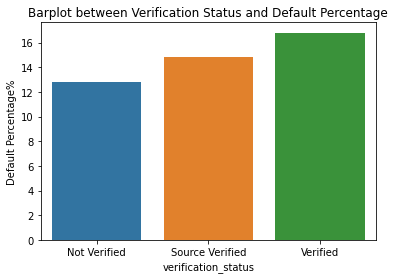

In [57]:
# Plotting bar plot to analyse between verification status and loan default percentage
sns.barplot(x=bivar_analyse('verification_status').index,y=bivar_analyse('verification_status')[0])
plt.title('Barplot between Verification Status and Default Percentage')
plt.ylabel('Default Percentage%')
plt.show()

### Observation
Verified customers commit more frauds then others, as the percentage of defaulted customers is higher for verified category

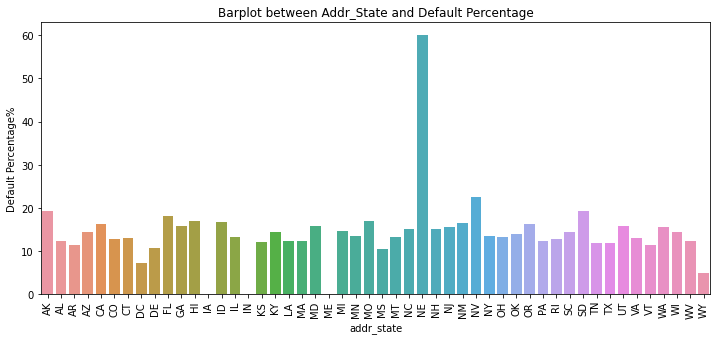

In [58]:
# Plotting bar plot to analyse between addr_state and loan default percentage
plt.figure(figsize=(12,5))
sns.barplot(x=bivar_analyse('addr_state').index,y=bivar_analyse('addr_state')[0])
plt.title('Barplot between Addr_State and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=90)
plt.show()

### Observation
Residents of NE,NV,SD have higher default percentage as compared to other addr_states

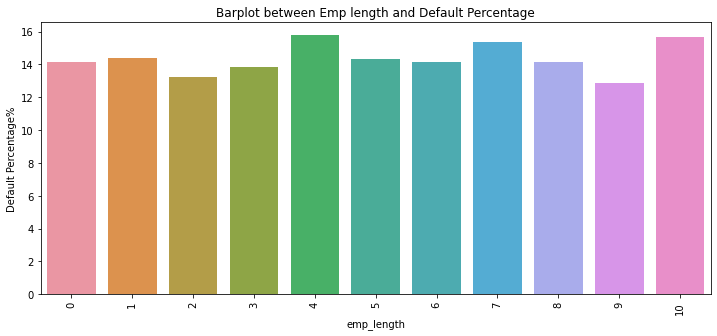

In [59]:
# Plotting bar plot to analyse between Employee job tenure and loan default percentage
plt.figure(figsize=(12,5))
sns.barplot(x=bivar_analyse('emp_length').index,y=bivar_analyse('emp_length')[0])
plt.title('Barplot between Emp length and Default Percentage')
plt.ylabel('Default Percentage%')
plt.xticks(rotation=90)
plt.show()

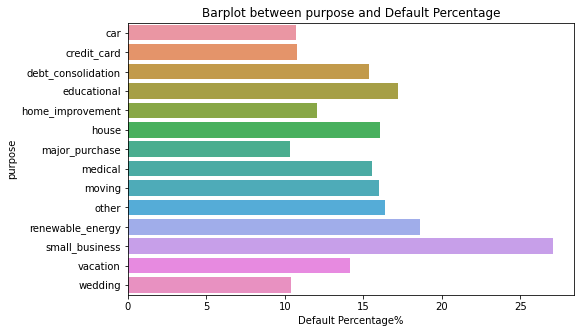

In [60]:
# Plotting bar plot to analyse between Purpose and loan default percentage
plt.figure(figsize=(8,5))
df_lc_chrgof=df_lc_loan[(df_lc_loan.loan_status=='Charged Off')]
sns.barplot(y=bivar_analyse('purpose').index,x=bivar_analyse('purpose')[0])
plt.title('Barplot between purpose and Default Percentage')
plt.xlabel('Default Percentage%')
plt.show()

### Observation
Small businesses cause most business loss, as they may face loss and are closed due to insufficient funds to mitigate the loss.
followed by reuseable energy, education, others and moving

# Multivariate analysis

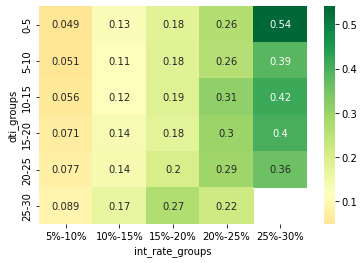

In [61]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='dti_groups', columns='int_rate_groups',values='loan_status_enc')
result
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Observation
With the increase in debt to income ratio, and intrest rate, percentage of default also increases.
Even for lesser dti ratio but high interest rate, frauds increases

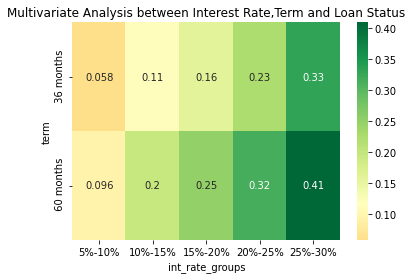

In [62]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='term', columns='int_rate_groups',values='loan_status_enc')
result
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Interest Rate,Term and Loan Status')
plt.show()

## Observation
For longer term and high interest rate, customer will have to pay more amount than he lended, so fraud percentage is higher than smaller ter and high interest rate.
It can be infered that loans given at high interest rate will have higher fraud percentage

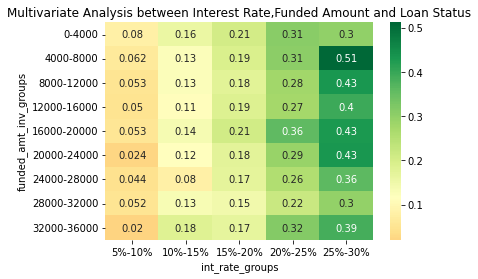

In [63]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='funded_amt_inv_groups', columns='int_rate_groups',values='loan_status_enc')
result
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Interest Rate,Funded Amount and Loan Status')
plt.show()

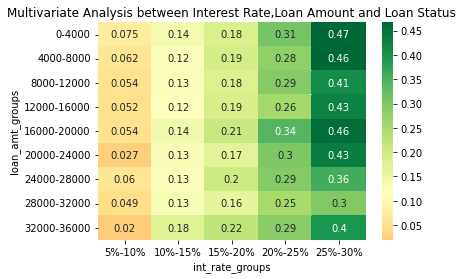

In [64]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='loan_amt_groups', columns='int_rate_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Interest Rate,Loan Amount and Loan Status')
plt.show()

### Observation
With increase in loan amount/funded amount along with increasing interest rates customer committing fraud percentage decreases,
customers with low loan amount and high interest rate are more likely to commit frauds.

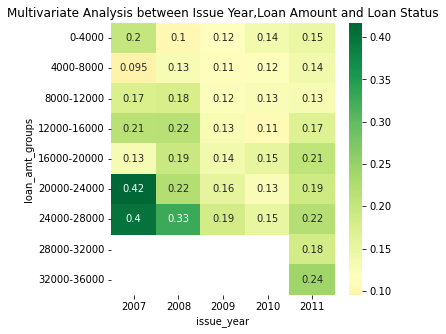

In [65]:
# Creating a pivot table and then using it to generate heat map
plt.figure(figsize=(5,5))
result = pd.pivot_table(data=df_lc_loan, index='loan_amt_groups', columns='issue_year',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Issue Year,Loan Amount and Loan Status')
plt.show()

### Observation
Loan amount increases with each year, maximum being in 2011 could be because of increase in inflation and income of customers.
Since in 2007 USA had an economic crisis, percentage of loan defaults is higher for large loan amounts,similar pattern can be seen in subsequent years, for large amount it's likely that customer may commit a fraud as compared for small loan amounts

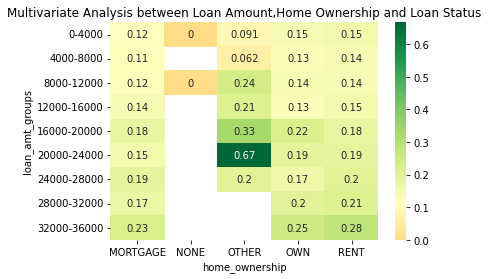

In [66]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='loan_amt_groups', columns='home_ownership',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Loan Amount,Home Ownership and Loan Status')
plt.show()

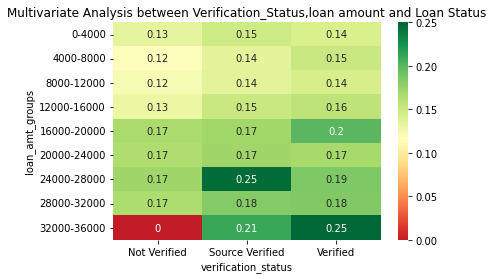

In [67]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='loan_amt_groups', columns='verification_status',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Verification_Status,loan amount and Loan Status')
plt.show()

### Observation
With increase in loan amount the likelyhood of lending clubs business loss increases, highest being for verified cutomers, followed by source verified customers

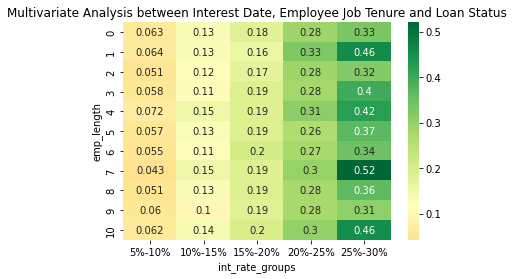

In [68]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='emp_length', columns='int_rate_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Interest Date, Employee Job Tenure and Loan Status')
plt.show()

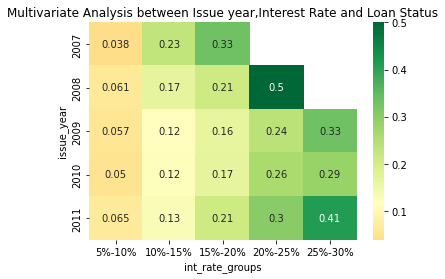

In [69]:
# Creating a pivot table and then using it to generate heat map
result = pd.pivot_table(data=df_lc_loan, index='issue_year', columns='int_rate_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Issue year,Interest Rate and Loan Status')
plt.show()

### Observation 
There's an increase in loan interest rate with years,till 2007 maximum interest rate offered was 20% but by 2011 it increased to 30% maybe with increase in economy, inflation and individual's income.
And likelyhood of default(charge off) also inceased with it, increasing each year for maximum interest rate

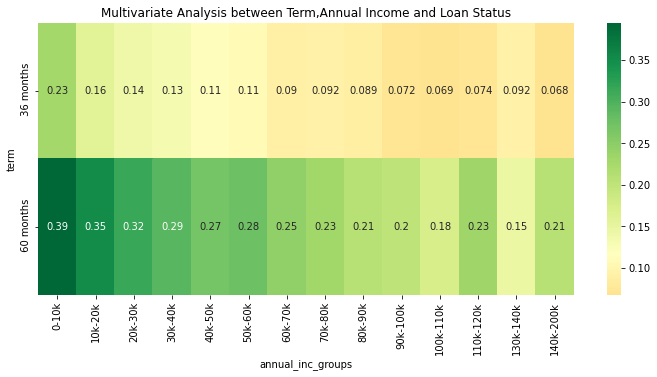

In [70]:
# Creating a pivot table and then using it to generate heat map
plt.figure(figsize=(12,5))
result = pd.pivot_table(data=df_lc_loan, index='term', columns='annual_inc_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Term,Annual Income and Loan Status')
plt.show()

### Observation
Lower annual income and long duration sees highest charge offs, as customers find it difficult to repay loans, but with lower term and lower income there's lesser charge offs as compared to longer terms.

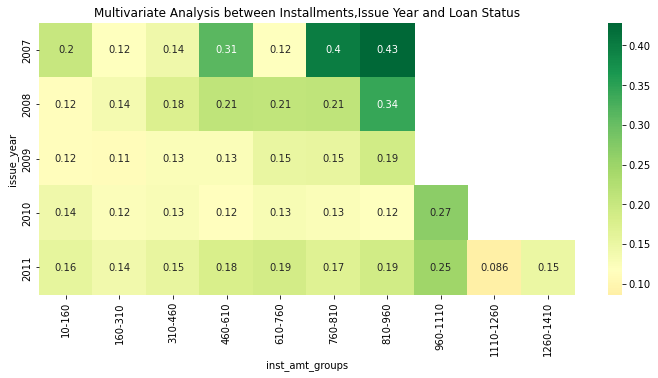

In [71]:
# Creating a pivot table and then using it to generate heat map
plt.figure(figsize=(12,5))
result = pd.pivot_table(data=df_lc_loan, index='issue_year', columns='inst_amt_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Installments,Issue Year and Loan Status')
plt.show()

### Observation
With each year as interest rate installments for loans also increases, and with higher installments customers avoid to repay leading to increased charged offs.

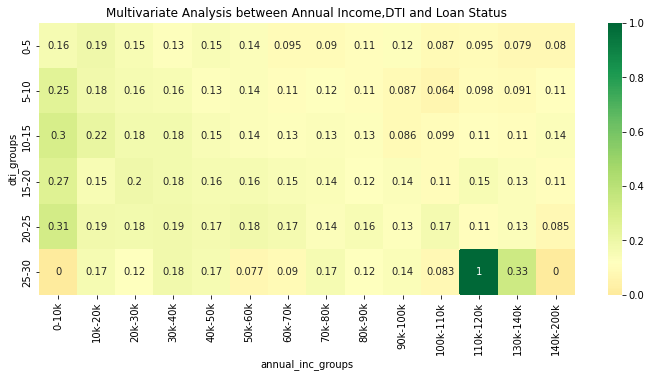

In [72]:
# Creating a pivot table and then using it to generate heat map
plt.figure(figsize=(12,5))
result = pd.pivot_table(data=df_lc_loan, index='dti_groups', columns='annual_inc_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Annual Income,DTI and Loan Status')
plt.show()

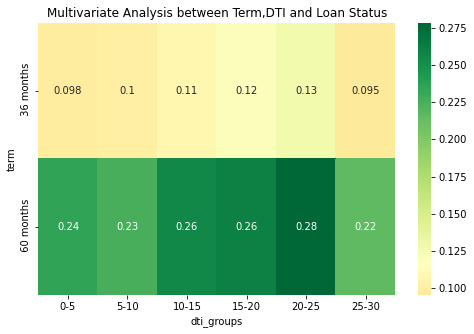

In [73]:
# Creating a pivot table and then using it to generate heat map
plt.figure(figsize=(8,5))
result = pd.pivot_table(data=df_lc_loan, index='term', columns='dti_groups',values='loan_status_enc')
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.title('Multivariate Analysis between Term,DTI and Loan Status')
plt.show()

### Observation
As the dti and term increases, it's evident that likelyhood of fraud increases,lower dti indicate higher income and lower debt and vice versa. 

Customers with lower dti and higher term are more susceptible for fraud as with increase in term they will have to pay more than lended based on their interest rate as compared to customers with low dti and lower loan term and similar pattern is with higher dti and higher term.

<Figure size 1440x1440 with 0 Axes>

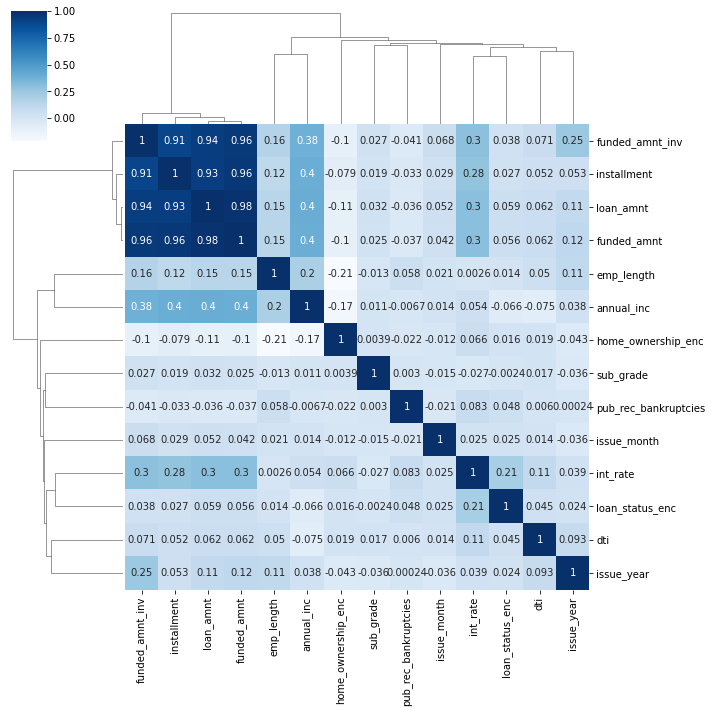

In [74]:
# Creating a cluster map to see correlation among columns
plt.figure(figsize=(20,20))
sns.clustermap(data=df_lc_loan.corr(),annot=True, cmap='Blues')
plt.show()

### Observation
1) Loan amount, Funded amount, Funded amount by investors are highly correlated.

2) Employee length(job tenure) is correlated to annual income

3) Interest rate is correlated to installments and funded amount, loan amount and loan status.

4) Annual income is correlated to installment amount and loan amount


# Conclusion based on EDA
1) Loan Amount,Funded Amount greater than 15000$ has higher percentages of defaults.

2) Defaulters have lesser annual incomes as compared to customers, causing more credit loss.

3) Customers with high debt-to-income ratio will tend to commit fraud

4) In 2007 there was an economic crisis in USA and in 2011, so the business loss for Lending Club is higher in these years

5) Residents of NE,NV,SD have higher default percentage as compared to other addr_states.

6) Small businesses cause most business loss, as they may face loss and are closed due to insufficient funds to mitigate the loss.

7) With increase in loan amount/funded amount along with increasing interest rates customer committing fraud percentage decreases.

8) With increase in loan amount/funded amount along with increasing interest rates customer committing fraud percentage decreases.

9) With increase in loan amount the likelyhood of lending clubs business loss increases, highest being for verified cutomers, followed by source verified customers

10) Customers with higher grades and subgrades (eg., D2-G5) commit more frauds, as compared to lower grade customers

## Driving Factors for Loan Defaults
1) Loan Amount:  Loan amount higher than 10000$ has more default percentage

2) Interest Rate:  Higher interest rates show higher loan defaults.

3) Annual Income: Lower annual incomes(up to 10K) shows higher loan defaults (up to 25%)

4) Installments:  Higher loan installments (between 600 to 1200) cause loan defaults.

5) DTI: 14-16% loan defaults caused by customers having DTI ratio higher than 10.

6) Term: 60 months have more loan defaults in comparison to 36 month term.

7) Purpose: Small business owners are more likely to commit frauds.

8) Grade: As the grade decreases (from A to G) default percent increases, customers with lower grades and subgrades are a risk.

9) Verification Status:  Verified customer are more prone to charge off (loan default)

# Recommendation based on EDA for Lending Club
1) Lending Club should be cautious before approving any loans above 15000$, <br>

2) If interest rate is higher, loan defaults are higher, consider approving loans at lower interest rates and low loan amounts.<br>

3) Lower annual income and higher DTI are a risk, avoid such applicants to reduce credit loss.<br>

4) Small business owners and 60 month loan terms are risk areas, should minimise these applicants.<br>

5)Applicants with lower grade and subgrade(D2-G5) should not be considered for loan approvals.<br>

6)Verified borrowers are causing more credit loss, update customer verification process.<br>